In [1]:
# load packages
import os
import sys
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

1.12.0


In [2]:
# load data from inbuilt repo
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print("Train:", x_train.shape, y_train.shape)
print("Test:", x_test.shape, y_test.shape)

Train: (60000, 28, 28) (60000,)
Test: (10000, 28, 28) (10000,)


In [4]:
# create a validation set
split_index = 2000
(x_val, x_test) = x_test[:2000], x_test[2000:]
(y_val, y_test) = y_test[:2000], y_test[2000:]
print("Validation Set:", x_val.shape, y_val.shape)

Validation Set: (2000, 28, 28) (2000,)


In [5]:
# view shape of the image
x_train[0].shape

(28, 28)

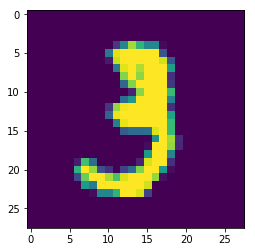

In [6]:
# plot one of the image in train set
plt.imshow(x_train[10])

In [7]:
# lets normlize the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_val = x_val.astype("float32") / 255.0

In [8]:
# one-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

In [9]:
# reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)
x_val = x_val.reshape(x_val.shape[0], w, h, 1)

In [10]:
# create a baseline cnn model
model = tf.keras.Sequential()

In [11]:
# add a convolutional block
model.add(tf.keras.layers.Conv2D(filters=32,
                                kernel_size=2,
                                padding="same",
                                activation="relu",
                                input_shape=(28, 28, 1)))

# add a max pooling layer
model.add(tf.keras.layers.MaxPool2D())

# add a dropout layer
model.add(tf.keras.layers.Dropout(rate=0.3))

In [12]:
# now flatten the output
model.add(tf.keras.layers.Flatten())

# add a dense layer with relu activation
model.add(tf.keras.layers.Dense(256, activation="relu"))

# add a dropout layer
model.add(tf.keras.layers.Dropout(rate=0.5))

# now add the final output layer: softmax layer
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [13]:
# compile the model
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

In [14]:
ckp = tf.keras.callbacks.ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

In [15]:
# train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val), callbacks=[ckp])

Train on 60000 samples, validate on 2000 samples
Epoch 1/10
59840/60000 [============================>.] - ETA: 0s - loss: 0.2693 - acc: 0.9201
Epoch 00001: val_loss improved from inf to 0.11187, saving model to model.weights.best.hdf5
60000/60000 [==============================] - 20s 336us/step - loss: 0.2690 - acc: 0.9202 - val_loss: 0.1119 - val_acc: 0.9665
Epoch 2/10
59840/60000 [============================>.] - ETA: 0s - loss: 0.1106 - acc: 0.9666
Epoch 00002: val_loss improved from 0.11187 to 0.08338, saving model to model.weights.best.hdf5
60000/60000 [==============================] - 20s 338us/step - loss: 0.1105 - acc: 0.9666 - val_loss: 0.0834 - val_acc: 0.9720
Epoch 3/10
59840/60000 [============================>.] - ETA: 0s - loss: 0.0822 - acc: 0.9746
Epoch 00003: val_loss improved from 0.08338 to 0.07629, saving model to model.weights.best.hdf5
60000/60000 [==============================] - 22s 362us/step - loss: 0.0823 - acc: 0.9746 - val_loss: 0.0763 - val_acc: 0.972

In [16]:
score = model.evaluate(x_test, y_test, verbose=1)
print("Test Accuracy = ", score[1])

8000/8000 [==============================] - 1s 87us/step
Test Accuracy =  0.988875


In [18]:
model.predict(x_test)

array([[1.8985251e-08, 7.5797381e-08, 3.7652046e-06, ..., 1.6419008e-10,
        4.2652890e-05, 7.9538172e-09],
       [1.5276555e-05, 4.9814567e-08, 2.8572401e-08, ..., 5.4146276e-06,
        2.4453243e-02, 8.6794598e-03],
       [1.9226645e-06, 1.0298045e-08, 1.5988400e-11, ..., 5.7715248e-13,
        1.3977592e-09, 3.5027210e-11],
       ...,
       [1.5737666e-15, 6.8619349e-10, 2.9167027e-14, ..., 5.9318785e-09,
        1.0254046e-07, 2.4447195e-07],
       [7.2077740e-11, 5.5656472e-11, 2.1240596e-12, ..., 2.0744664e-10,
        6.1189741e-05, 3.2293127e-11],
       [2.6988844e-10, 1.9107118e-12, 1.4715433e-09, ..., 2.4387524e-16,
        6.6848914e-13, 2.0222771e-14]], dtype=float32)